Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.6 kB/s 
     |████████████████████████████████| 5.8 MB 28.1 MB/s 
     |████████████████████████████████| 1.6 MB 50.7 MB/s 
     |████████████████████████████████| 438 kB 61.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

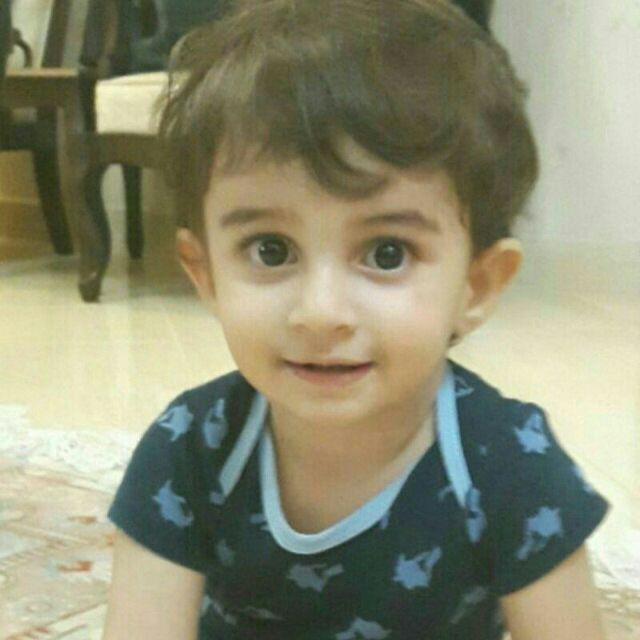

1/1 [==============================] - 0s 128ms/step


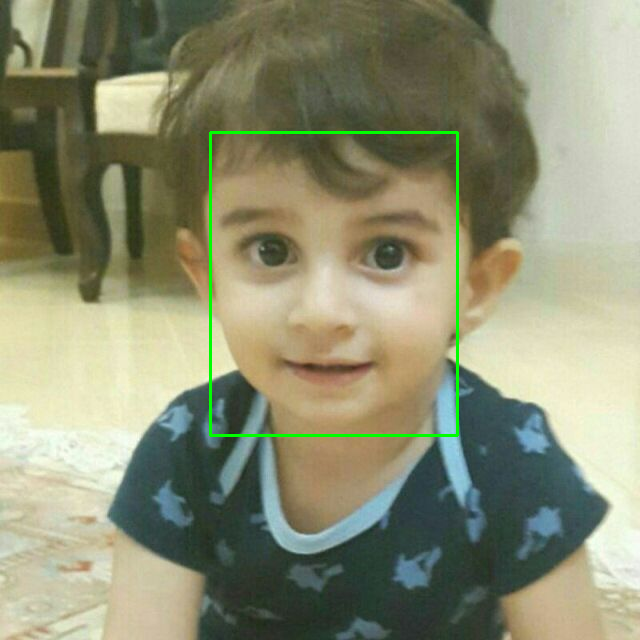

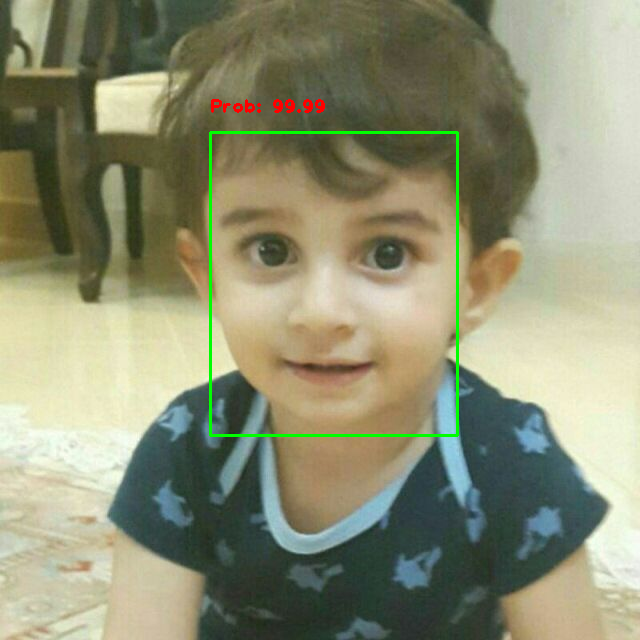

left_eye (273, 253)


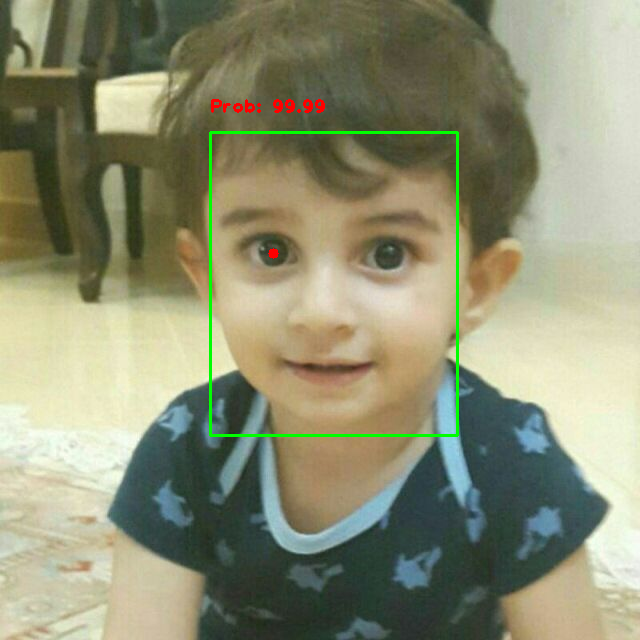

right_eye (387, 255)


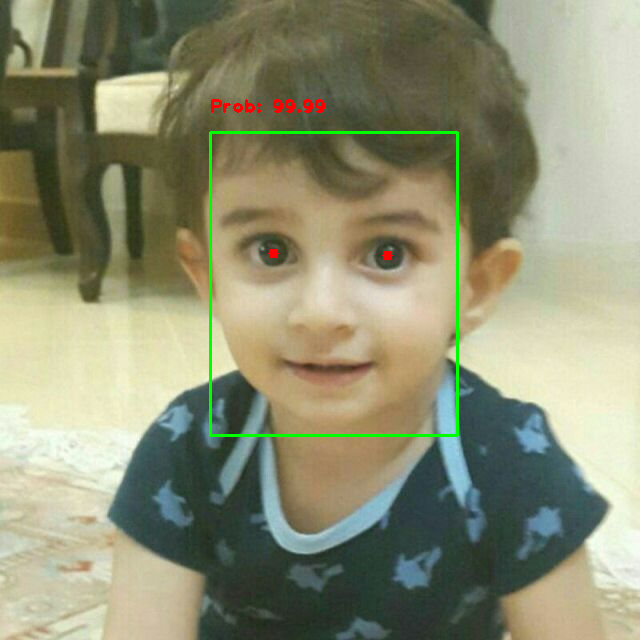

nose (323, 318)


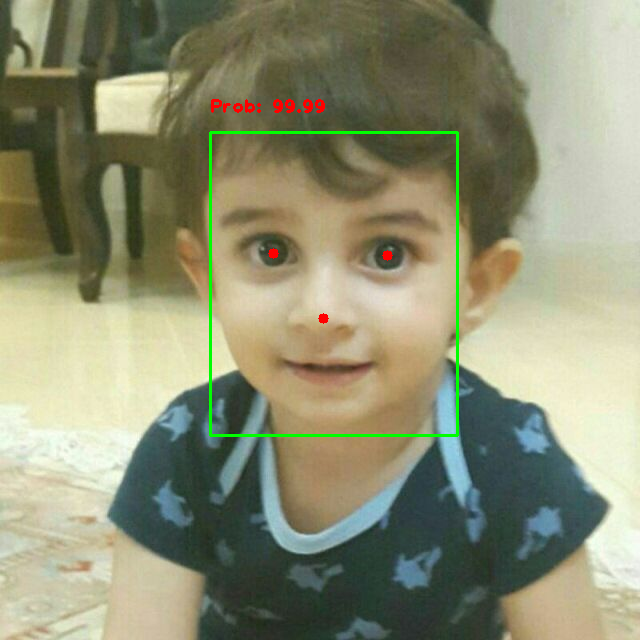

mouth_left (281, 361)


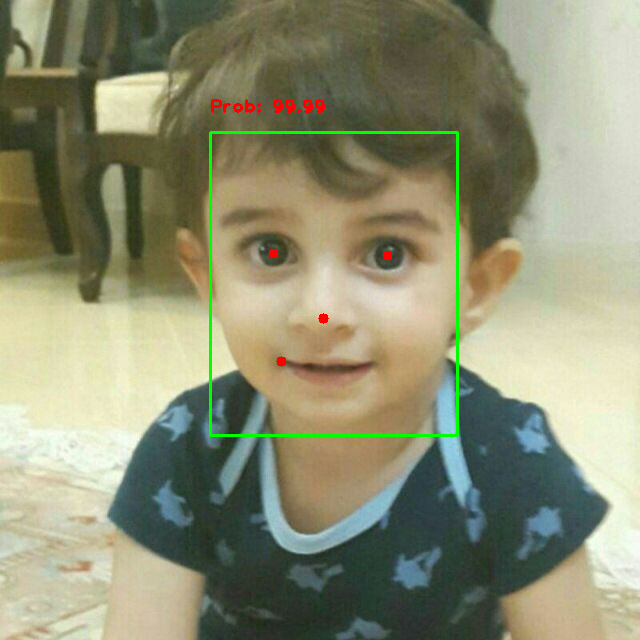

mouth_right (381, 363)


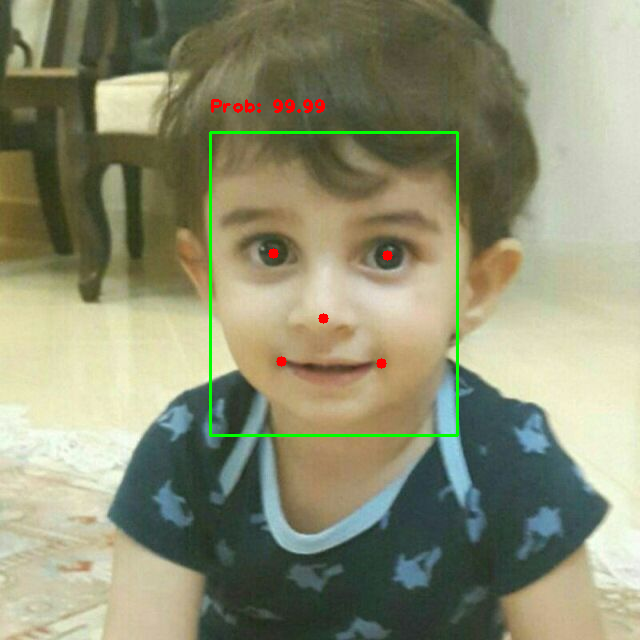

In [ ]:
!pip install tensorflow==2.9.1
import tensorflow as tf
!pip install mtcnn
from mtcnn.mtcnn import MTCNN
import cv2
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
from google.colab.patches import cv2_imshow
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"
#from mtcnn import MTCNN

#فراخوانی مدل تشخیص چهره
detector=MTCNN()

#خواندن عکس
img= cv2.imread("/content/drive/MyDrive/Colab Notebooks/rasa.jpg")
cv2_imshow(img)
rgb_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
out=detector.detect_faces(rgb_img)[0]

#ایجاد مستطیل دور صورت
x, y, w, h= out["box"]
cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)
cv2_imshow(img)

#تعیین سطح اطمینان تشخیص چهره
confidence= out["confidence"]
# نوشتن مقدار سطح اطمینان بالای مستطیل
text= "Prob: {:.2f}".format (confidence*100)
cv2.putText(img, text, (x, y-20), cv2.FONT_HERSHEY_PLAIN, 1.2, (0,0,255), 2)
cv2_imshow(img)

#Face Alignmnet:
kp= out["keypoints"]
for key, value in kp.items():
  print(key, value)
  cv2.circle (img, value, 5, (0,0,255), -1)
  cv2_imshow(img)

  
